In [1]:
import pandas as pd

In [2]:
auto_train = pd.read_csv('Automobile Train.csv')
auto_test = pd.read_csv('Automobile Test.csv')

In [3]:
auto_train.shape

(8068, 11)

In [4]:
auto_test.shape

(2627, 11)

In [5]:
auto = pd.concat([auto_train, auto_test], axis=0) 
# Here is 0 because we don't want to add more columns. Both tables have values for the same columns. 

In [6]:
auto.reset_index(drop=True, inplace=True)

In [ ]:
# Spending_Score Spending score of the customer.
# Family_Size Number of family members for the customer (including the customer).
# Var_1 Anonymised Category for the customer.
# Segmentation (target) Customer Segment of the customer.

## EXPLORATION & CLEANING

In [7]:
auto.shape

(10695, 11)

In [8]:
auto.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [9]:
#Checking if unique values make sense. 
# 'Work_Experience','Family_Size','Var_1'
auto['Ever_Married'].value_counts()
# Weird values on Family size: 1349 families have 5-9 members, but the distribution is normal.
# Var_1  there are Cat_1 - Cat_7. The numbers don't mean an order. 

# Segmentation: (target) Customer Segment of the customer
# Family_Size: Number of family members for the customer (including the customer)
# Var_1: Anonymised Category for the customer

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [10]:
auto.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [11]:
auto.isna().sum().sum()
# auto_train null values: 1582
# auto_test null values: 526

2108

In [12]:
# Replacing in cat, the NaN values with "U" (Unknow)
auto[['Ever_Married', 'Graduated', 'Profession','Var_1']] = auto[['Ever_Married', 'Graduated', 'Profession','Var_1']].fillna('U')

In [13]:
auto.isna().sum().sum()

1546

In [14]:
auto.reset_index(drop=True, inplace=True)

In [15]:
auto.shape

(10695, 11)

In [16]:
# Replacing in num the NaN values with its median
auto['Family_Size'].fillna(auto['Family_Size'].median(), inplace=True)
auto['Work_Experience'].fillna(auto['Work_Experience'].median(), inplace=True)
# Before to remove decimals I need to replace the NaN values in the numerical.

In [17]:
auto['Family_Size'] = auto['Family_Size'].astype(int)
auto['Work_Experience'] = auto['Work_Experience'].astype(int)

In [18]:
auto[['Work_Experience','Family_Size']]

,Work_Experience,Family_Size
0,1,4
1,1,3
2,1,1
3,0,2
4,1,6
...,...,...
10690,9,4
10691,1,1
10692,1,2
10693,1,5


In [19]:
# Cheking unique values make sense

In [20]:
auto['Family_Size'].value_counts() 
# I checked all the variables, but I removed to improve the readability
# Anyway we will see that on the plots. 

2    3158
3    2400
1    1965
4    1823
5     812
6     290
7     122
8      65
9      60
Name: Family_Size, dtype: int64

In [21]:
duplicates = auto[auto.duplicated()]
duplicate_count = len(duplicates)
#print(f"Number of duplicates: {duplicate_count}")
#print("Duplicate Rows:")
duplicate_count

38

In [22]:
auto = auto.drop_duplicates()
auto.shape

(10657, 11)

In [23]:
# Cheking if there are any blank values (empty strings). 
is_blank = auto.apply(lambda x: x.astype(str).str.strip().eq('')).any() # is the lambda function that is being applied to each column. 
# x.astype(str) converts each column to a string data type.
# str.strip() removes any leading or trailing whitespace from each value in the column.
# eq('') checks if each value in the column is equal to an empty string. It returns a boolean Series where True represents an empty string value.
# .any() is a pandas function used on the resulting DataFrame after applying the lambda function. It checks if there is any True value (i.e., any empty string) present in each column.
is_blank

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool

In [24]:
# I need to replace Low, Average and High because they represent a jerarchy. 
# Encode method will not be able to disinguish that. 

In [25]:
auto

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1,Average,3,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1,High,6,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9,Low,4,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1,Low,1,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,1,Low,2,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1,High,5,Cat_4,C


In [26]:
mapping = {'Low': 1, 'Average': 2, 'High': 3}
auto['Spending_Score'] = auto['Spending_Score'].replace(mapping)

In [27]:
auto['Spending_Score']

0        1
1        2
2        1
3        3
4        3
        ..
10690    1
10691    1
10692    1
10693    3
10694    1
Name: Spending_Score, Length: 10657, dtype: int64

In [28]:
auto.dtypes

ID                  int64
Gender             object
Ever_Married       object
Age                 int64
Graduated          object
Profession         object
Work_Experience     int32
Spending_Score      int64
Family_Size         int32
Var_1              object
Segmentation       object
dtype: object

In [29]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10657 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10657 non-null  int64 
 1   Gender           10657 non-null  object
 2   Ever_Married     10657 non-null  object
 3   Age              10657 non-null  int64 
 4   Graduated        10657 non-null  object
 5   Profession       10657 non-null  object
 6   Work_Experience  10657 non-null  int32 
 7   Spending_Score   10657 non-null  int64 
 8   Family_Size      10657 non-null  int32 
 9   Var_1            10657 non-null  object
 10  Segmentation     10657 non-null  object
dtypes: int32(2), int64(3), object(6)
memory usage: 915.8+ KB


In [30]:
auto.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10657.0,NaN,NaN,NaN,463465.987708,2600.128087,458982.0,461220.0,463449.0,465727.0,467974.0
Gender,10657,2,Male,5821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,10657,3,Yes,6145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10657.0,NaN,NaN,NaN,43.537956,16.7696,18.0,30.0,41.0,53.0,89.0
Graduated,10657,3,Yes,6550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,10657,10,Artist,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,10657.0,NaN,NaN,NaN,2.458196,3.25265,0.0,0.0,1.0,4.0,14.0
Spending_Score,10657.0,NaN,NaN,NaN,1.543399,0.740441,1.0,1.0,1.0,2.0,3.0
Family_Size,10657.0,NaN,NaN,NaN,2.850333,1.504507,1.0,2.0,3.0,4.0,9.0
Var_1,10657,8,Cat_6,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
## PLOTS TO CHECK OUTLIERS OR IMBALANCE. 

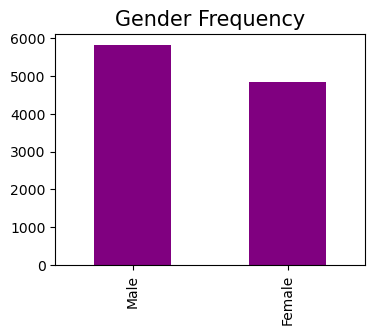

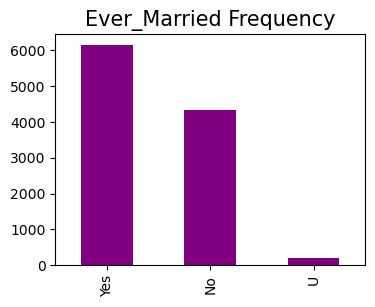

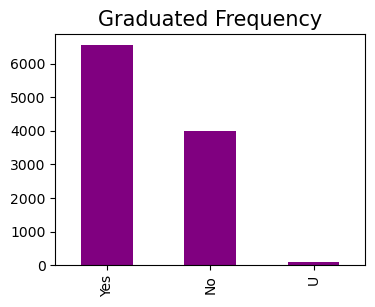

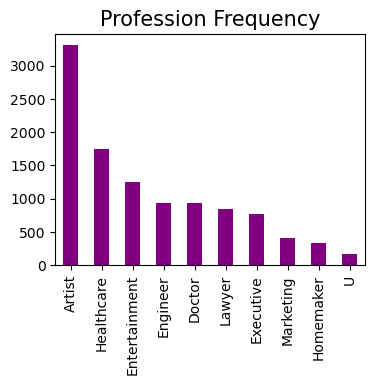

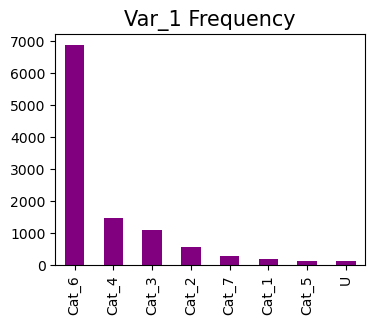

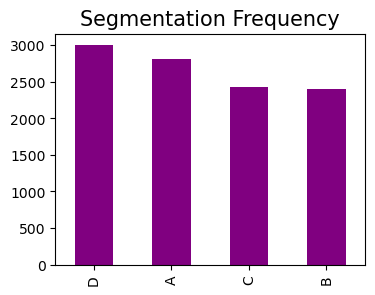

In [32]:
# PLOT THE CATEGORICAL.
import matplotlib.pyplot as plt

def plot_frequency(column_name):
    plt.figure(figsize=(4, 3))
    auto[column_name].value_counts().plot.bar(color="purple")
    plt.title(f"{column_name} Frequency", fontsize=15)
# In Python, the letter "f" is used to create f-strings, which are a way to format strings with embedded expressions.
# It allows you to directly include variables or expressions within curly braces {} inside the string.
# In the provided code, the f-string is used to dynamically include the value of the column_name variable
# within the string passed to the plt.title() function.
    plt.show()

plot_frequency("Gender")
plot_frequency("Ever_Married")
plot_frequency("Graduated")
plot_frequency("Profession") 
plot_frequency("Var_1")
plot_frequency("Segmentation") # this will be our target. 

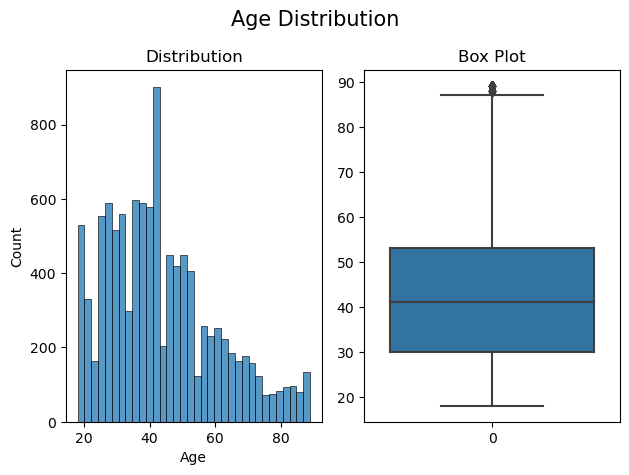

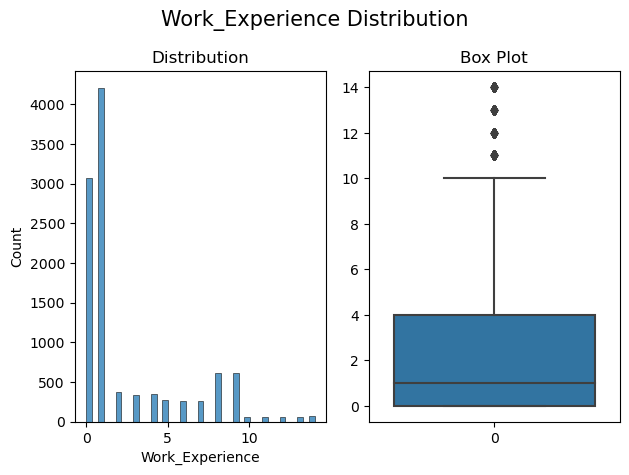

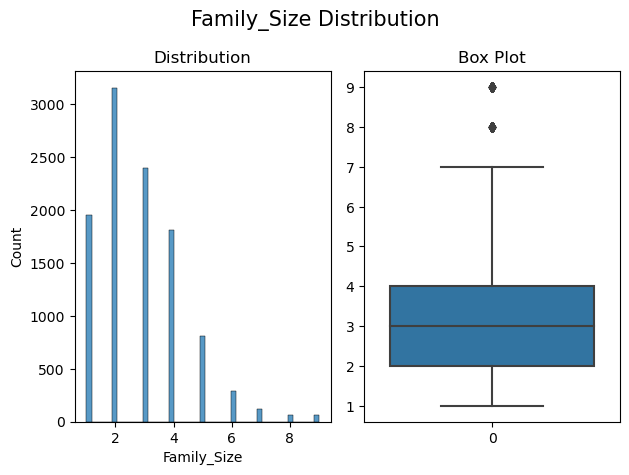

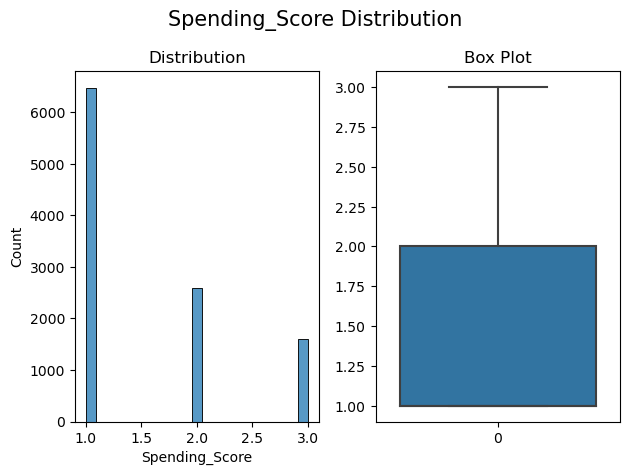

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric(column_name):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"{column_name} Distribution", fontsize=15)

    sns.histplot(auto[column_name], ax=ax[0])
    ax[0].set_title("Distribution")

    sns.boxplot(auto[column_name], ax=ax[1])
    ax[1].set_title("Box Plot")

    plt.tight_layout()
    plt.show()

plot_numeric("Age")
plot_numeric("Work_Experience")
plot_numeric("Family_Size")
plot_numeric("Spending_Score")

In [34]:
auto_balancing_Var1 = auto["Var_1"].value_counts()
auto_balancing_Var1 = auto["Var_1"].value_counts()/auto.shape[0]*100

auto_balancing_Var1

Cat_6    64.642958
Cat_4    13.774984
Cat_3    10.152951
Cat_2     5.273529
Cat_7     2.505396
Cat_1     1.567045
Cat_5     1.069719
U         1.013418
Name: Var_1, dtype: float64

In [35]:
auto_balancing_Ss = auto["Spending_Score"].value_counts()
auto_balancing_Ss = auto["Spending_Score"].value_counts()/auto.shape[0]*100

auto_balancing_Ss

1    60.664352
2    24.331425
3    15.004223
Name: Spending_Score, dtype: float64

In [36]:
# Outliers Categorical? after encode them?
columns_to_check = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']
for column in columns_to_check:
    q1 = auto[column].quantile(0.25)
    q3 = auto[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = auto[(auto[column] < lower_bound) | (auto[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in Age: 90
Number of outliers in Work_Experience: 247
Number of outliers in Family_Size: 125
Number of outliers in Spending_Score: 0


In [37]:
auto["Work_Experience_to_Age_Ratio"] = auto["Work_Experience"] / auto["Age"]
auto["Work_Experience_to_Age_Ratio"]

0        0.045455
1        0.026316
2        0.014925
3        0.000000
4        0.025000
           ...   
10690    0.310345
10691    0.028571
10692    0.018868
10693    0.021277
10694    0.209302
Name: Work_Experience_to_Age_Ratio, Length: 10657, dtype: float64

In [38]:
auto.to_csv('auto_clean', index=False)

In [39]:
# BEFORE TO SCALE I WILL CONCATENATE WITH THE 2º DATAFRAME. IN THE NOTEBOOK "Creating new columns".
# There, the gidtribuiton graphs are dsiplayed.

In [40]:
auto2 = pd.read_csv('more_auto')

In [41]:
auto2.shape

(10600, 3)

In [42]:
auto2.reset_index(drop=True, inplace=True)

In [43]:
auto2.shape

(10600, 3)

In [44]:
auto.shape

(10657, 12)

In [45]:
auto.reset_index(drop=True, inplace=True)

In [46]:
auto.shape

(10657, 12)

In [47]:
autodf = pd.concat([auto, auto2], axis=1)

In [48]:
autodf.shape

(10657, 15)

In [49]:
autodf.reset_index(drop=True, inplace=True)

In [50]:
autodf.shape

(10657, 15)

In [51]:
autodf.isna().sum().sum()

171

In [52]:
autodf = autodf.dropna()

In [53]:
autodf.isna().sum().sum()

0

In [54]:
autodf.shape

(10600, 15)

In [55]:
autodf

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_to_Age_Ratio,weekly_average_km_values,type_of_road_values,numbers_of_occupant
0,462809,Male,No,22,No,Healthcare,1,1,4,Cat_4,D,0.045455,47.0,town,3.0
1,462643,Female,Yes,38,Yes,Engineer,1,2,3,Cat_4,A,0.026316,65.0,city,1.0
2,466315,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B,0.014925,105.0,village,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B,0.000000,78.0,village,2.0
4,462669,Female,Yes,40,Yes,Entertainment,1,3,6,Cat_6,A,0.025000,90.0,city,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,467749,Male,No,20,No,Healthcare,0,1,9,Cat_7,D,0.000000,150.0,city,2.0
10596,467763,Female,No,50,Yes,Artist,1,1,1,Cat_2,A,0.020000,118.0,forest,3.0
10597,467767,Female,No,21,No,Marketing,4,1,4,Cat_6,D,0.190476,50.0,city,2.0
10598,467768,Male,Yes,62,Yes,Doctor,0,2,2,Cat_6,C,0.000000,14.0,town,1.0


### PROCESSING (ENCODE AND SCALE)

In [56]:
X = autodf.drop(['Segmentation','ID'], axis = 1) 
y = autodf['Segmentation'] #Target

In [57]:
import numpy as np
autodf_cat = autodf.select_dtypes(include = object)
autodf_num = autodf.select_dtypes(include = np.number)

In [58]:
# ENCODE
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(autodf_cat)
encoded_categorical = encoder.transform(autodf_cat).toarray()

autodf_cat_encoded = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [59]:
# SCALE NUMERICALS
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(autodf_num)
autodf_num_norm = transformer.transform(autodf_num)
autodf_num_scaled = pd.DataFrame(autodf_num_norm, index = autodf_num.index, columns = autodf_num.columns)

In [60]:
autodf_cat_encoded.shape
autodf_cat_encoded.reset_index(drop=True, inplace=True)

In [61]:
autodf_num_scaled.shape
autodf_num_scaled.reset_index(drop=True, inplace=True)

In [62]:
autodf_processed = pd.concat([autodf_num_scaled, autodf_cat_encoded],axis=1)
autodf_processed.reset_index(drop=True, inplace=True)

In [63]:
autodf_processed

,ID,Age,Work_Experience,Spending_Score,Family_Size,Work_Experience_to_Age_Ratio,weekly_average_km_values,numbers_of_occupant,Gender_Male,Ever_Married_U,...,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_U,Segmentation_B,Segmentation_C,Segmentation_D,type_of_road_values_forest,type_of_road_values_town,type_of_road_values_village
0,0.425601,0.056338,0.071429,0.0,0.375,0.058442,0.217647,0.50,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.407140,0.281690,0.071429,0.5,0.250,0.033835,0.323529,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.815503,0.690141,0.071429,0.0,0.000,0.019190,0.558824,0.00,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.306161,0.690141,0.000000,1.0,0.125,0.000000,0.400000,0.25,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.410031,0.309859,0.071429,1.0,0.625,0.032143,0.470588,0.75,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,0.974978,0.028169,0.000000,0.0,1.000,0.000000,0.823529,0.25,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10596,0.976535,0.450704,0.071429,0.0,0.000,0.025714,0.635294,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10597,0.976980,0.042254,0.285714,0.0,0.375,0.244898,0.235294,0.25,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10598,0.977091,0.619718,0.000000,0.5,0.125,0.000000,0.023529,0.00,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### MULTICOLINEARITY

<function matplotlib.pyplot.show(close=None, block=None)>

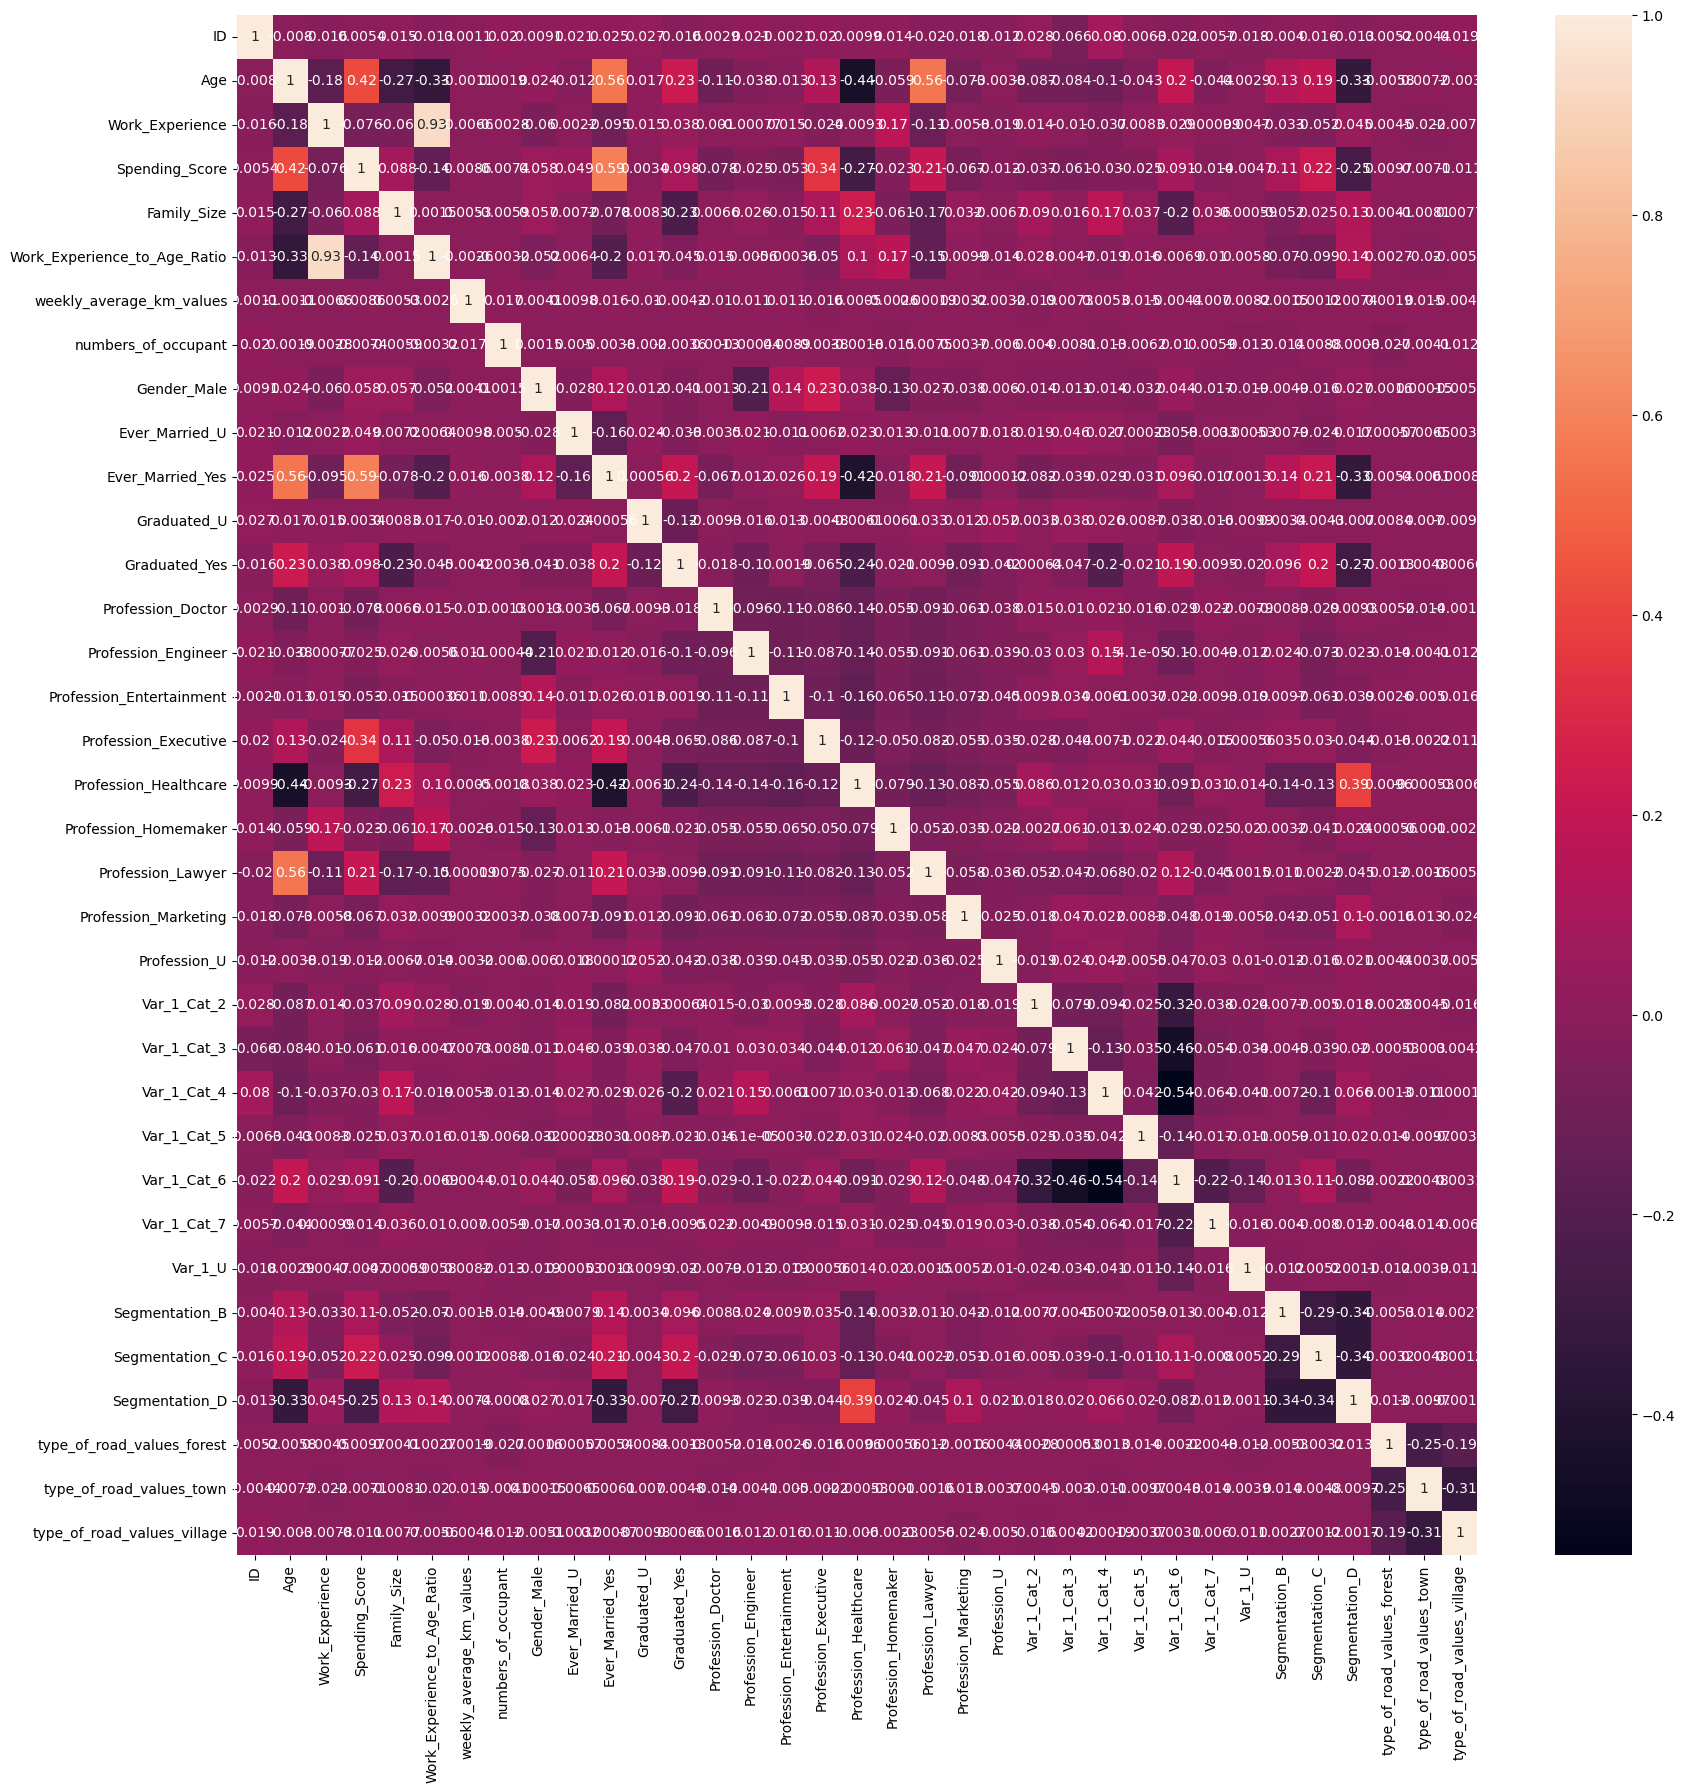

In [64]:
# Multicolinearity. 
correlations_matrix = autodf_processed.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations_matrix, annot=True)
plt.show

In [65]:
# !pip install threadpoolctl==3.1.0

In [66]:
autodf_prep = MinMaxScaler().fit_transform(autodf_processed)

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(autodf_prep)

C:\Users\IUREK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1234)

In [68]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(autodf_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    3564
1    2533
2    2137
3    2366
dtype: int64

In [69]:
clusters #What does it means this output?

array([1, 3, 0, ..., 1, 2, 3])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

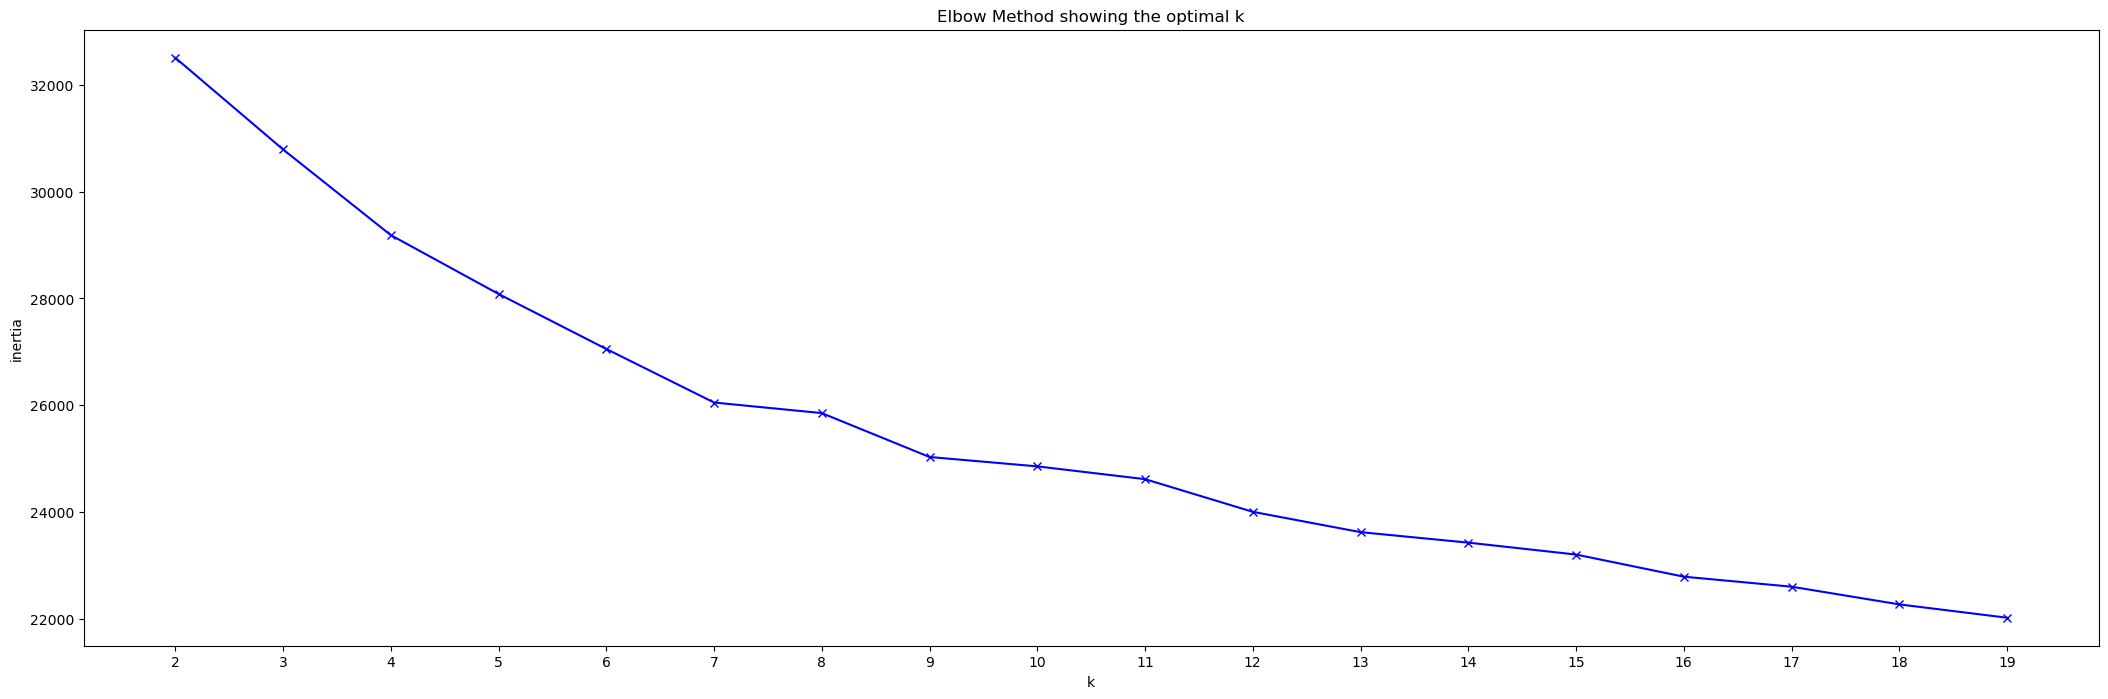

In [70]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init = "auto", # n_init = "auto" ignoring the warnings.
                    random_state=1234)
    kmeans.fit(autodf_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

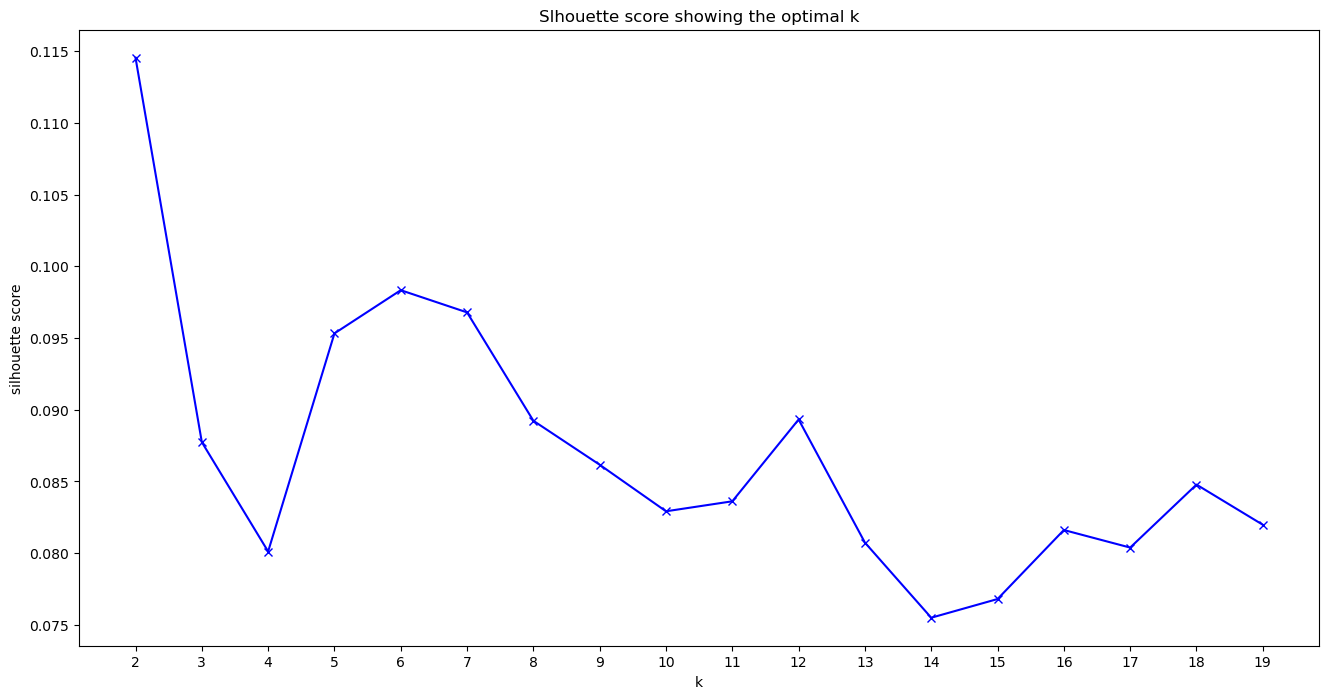

In [71]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init = "auto",
                    random_state=1234)
    kmeans.fit(autodf_prep)
    silhouette.append(silhouette_score(autodf_prep, kmeans.predict(autodf_prep)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [72]:
clusters_df = pd.DataFrame(clusters)
clusters_df.reset_index(drop=True, inplace=True)

In [73]:
clusters_df

,0
0,1
1,3
2,0
3,0
4,0
...,...
10595,1
10596,3
10597,1
10598,2


In [75]:
autodf.reset_index()

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_to_Age_Ratio,weekly_average_km_values,type_of_road_values,numbers_of_occupant
0,0,462809,Male,No,22,No,Healthcare,1,1,4,Cat_4,D,0.045455,47.0,town,3.0
1,1,462643,Female,Yes,38,Yes,Engineer,1,2,3,Cat_4,A,0.026316,65.0,city,1.0
2,2,466315,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B,0.014925,105.0,village,1.0
3,3,461735,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B,0.000000,78.0,village,2.0
4,4,462669,Female,Yes,40,Yes,Entertainment,1,3,6,Cat_6,A,0.025000,90.0,city,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,10595,467749,Male,No,20,No,Healthcare,0,1,9,Cat_7,D,0.000000,150.0,city,2.0
10596,10596,467763,Female,No,50,Yes,Artist,1,1,1,Cat_2,A,0.020000,118.0,forest,3.0
10597,10597,467767,Female,No,21,No,Marketing,4,1,4,Cat_6,D,0.190476,50.0,city,2.0
10598,10598,467768,Male,Yes,62,Yes,Doctor,0,2,2,Cat_6,C,0.000000,14.0,town,1.0


In [76]:
autodf_clusters = pd.concat([autodf,clusters_df], axis=1)

In [77]:
autodf_clusters = autodf_clusters.rename(columns={0:'clusters'})

In [78]:
autodf_clusters

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_to_Age_Ratio,weekly_average_km_values,type_of_road_values,numbers_of_occupant,clusters
0,462809,Male,No,22,No,Healthcare,1,1,4,Cat_4,D,0.045455,47.0,town,3.0,1
1,462643,Female,Yes,38,Yes,Engineer,1,2,3,Cat_4,A,0.026316,65.0,city,1.0,3
2,466315,Female,Yes,67,Yes,Engineer,1,1,1,Cat_6,B,0.014925,105.0,village,1.0,0
3,461735,Male,Yes,67,Yes,Lawyer,0,3,2,Cat_6,B,0.000000,78.0,village,2.0,0
4,462669,Female,Yes,40,Yes,Entertainment,1,3,6,Cat_6,A,0.025000,90.0,city,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,467749,Male,No,20,No,Healthcare,0,1,9,Cat_7,D,0.000000,150.0,city,2.0,1
10596,467763,Female,No,50,Yes,Artist,1,1,1,Cat_2,A,0.020000,118.0,forest,3.0,3
10597,467767,Female,No,21,No,Marketing,4,1,4,Cat_6,D,0.190476,50.0,city,2.0,1
10598,467768,Male,Yes,62,Yes,Doctor,0,2,2,Cat_6,C,0.000000,14.0,town,1.0,2


In [79]:
autodf_clusters.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Work_Experience_to_Age_Ratio',
       'weekly_average_km_values', 'type_of_road_values',
       'numbers_of_occupant', 'clusters'],
      dtype='object')

In [98]:
autodf_clusters.to_csv('autodf_clusters.csv', index=False)

### EXPLORING CLUSTERS

In [ ]:
# Why in another notebook?

In [84]:
# Spending_Score Spending score of the customer.
# Family_Size Number of family members for the customer (including the customer).
# Var_1 Anonymised Category for the customer.
# Segmentation (target) Customer Segment of the customer.